# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [157]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
## Generate Cities List

In [84]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [85]:
#request URL as JSON
url = "http://api.openweathermap.org/data/2.5/weather?"


query_url = url + "appid=" + "1fac825d3f4eabbbdded7136ed883475" + "&q=" + city
weather_response = requests.get(query_url)
weather_json = weather_response.json()


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [86]:


lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

#loop through all cities and append weather information
for count, city in enumerate(cities):
    query_url = url + "appid=" + "1fac825d3f4eabbbdded7136ed883475" + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #append and print if successful
    try:
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        maxtemp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        windspeed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        
        print("Processing Record " + str(count) + " | " + city)
    #print if unsuccessful            
    except:
        print("City Not Found")

Processing Record 0 | punta arenas
Processing Record 1 | pontian kecil
Processing Record 2 | alta floresta
Processing Record 3 | oktyabrskiy
Processing Record 4 | busselton
Processing Record 5 | atuona
Processing Record 6 | tuktoyaktuk
City Not Found
Processing Record 8 | albany
Processing Record 9 | ushuaia
Processing Record 10 | khatanga
Processing Record 11 | shalya
Processing Record 12 | nantucket
Processing Record 13 | vardo
Processing Record 14 | hermanus
Processing Record 15 | khammam
Processing Record 16 | east london
Processing Record 17 | kapaa
Processing Record 18 | dzerzhinskoye
Processing Record 19 | cape town
Processing Record 20 | seoul
Processing Record 21 | nikolskoye
Processing Record 22 | jamestown
Processing Record 23 | linjiang
Processing Record 24 | bredasdorp
Processing Record 25 | hithadhoo
Processing Record 26 | butaritari
Processing Record 27 | surami
Processing Record 28 | avarua
Processing Record 29 | ambon
Processing Record 30 | puerto ayora
Processing Reco

Processing Record 261 | pilar
Processing Record 262 | stargard szczecinski
Processing Record 263 | cidreira
Processing Record 264 | lakselv
Processing Record 265 | zabol
Processing Record 266 | bere
Processing Record 267 | kutahya
Processing Record 268 | maldonado
Processing Record 269 | high level
Processing Record 270 | elat
Processing Record 271 | lucapa
City Not Found
Processing Record 273 | okhotsk
Processing Record 274 | kruisfontein
Processing Record 275 | perth
Processing Record 276 | grindavik
Processing Record 277 | dukat
Processing Record 278 | luwuk
Processing Record 279 | jalu
Processing Record 280 | codrington
Processing Record 281 | kingman
Processing Record 282 | egvekinot
Processing Record 283 | kirakira
Processing Record 284 | sao miguel do araguaia
Processing Record 285 | gornopravdinsk
Processing Record 286 | raga
Processing Record 287 | half moon bay
Processing Record 288 | hualmay
Processing Record 289 | maun
Processing Record 290 | cayenne
Processing Record 291 |

Processing Record 519 | kota kinabalu
Processing Record 520 | sao gabriel da cachoeira
Processing Record 521 | acoyapa
Processing Record 522 | bereznik
City Not Found
Processing Record 524 | arvi
City Not Found
Processing Record 526 | menongue
Processing Record 527 | tagusao
Processing Record 528 | dembi dolo
Processing Record 529 | rio grande
Processing Record 530 | zainsk
Processing Record 531 | songjianghe
Processing Record 532 | nouakchott
Processing Record 533 | flin flon
Processing Record 534 | katherine
Processing Record 535 | hamilton
Processing Record 536 | dong hoi
Processing Record 537 | vostok
Processing Record 538 | grafton
Processing Record 539 | abu kamal
Processing Record 540 | kutum
Processing Record 541 | arlington
Processing Record 542 | kudahuvadhoo
Processing Record 543 | pisco
Processing Record 544 | kushima
Processing Record 545 | mahibadhoo
Processing Record 546 | birjand
Processing Record 547 | komsomolets
Processing Record 548 | hailun
Processing Record 549 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [161]:
data = pd.DataFrame(list(zip (lat, lng, maxtemp, humidity, cloudiness, windspeed, country, date)), columns = ['lat', 'lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'country', 'date'])
data.to_csv("../output_data/cities.csv",index = False, header = True)
data


,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,country,date
0,-53.15,-70.92,272.15,92,18,5.10,CL,1594463357
1,1.48,103.39,300.93,94,20,1.00,MY,1594463530
2,-9.88,-56.09,292.60,65,0,1.25,BR,1594463530
3,54.48,53.47,297.31,79,95,5.09,RU,1594463530
4,-33.65,115.33,284.26,58,1,4.15,AU,1594463530
...,...,...,...,...,...,...,...,...
561,-5.13,-49.33,296.15,94,47,0.89,BR,1594463610
562,-0.72,8.78,300.15,78,40,5.80,GA,1594463641
563,37.78,-121.98,292.59,51,1,1.23,US,1594463392
564,35.51,27.21,301.15,61,20,14.40,GR,1594463641


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [91]:
data[data["Humidity"] > 100]

,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,country,date


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

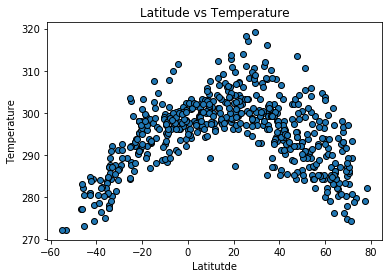

In [162]:
#Temperature gets higher as latitude gets closer to 0
plt.scatter(data["lat"], data["Max Temp"], edgecolors = "black")
plt.title("Latitude vs Temperature")
plt.xlabel("Latitutde")
plt.ylabel("Temperature")
plt.savefig("../output_data/Fig1.png")

## Latitude vs. Humidity Plot

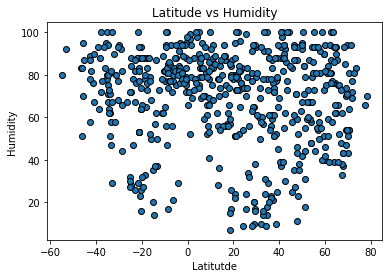

In [163]:
plt.scatter(data["lat"], data["Humidity"], edgecolors = "black")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitutde")
plt.ylabel("Humidity")
plt.savefig("../output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

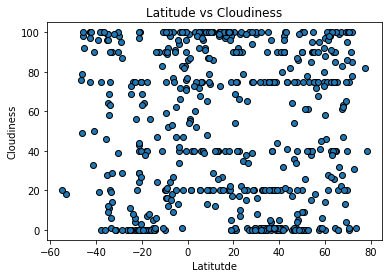

In [164]:
plt.scatter(data["lat"], data["Cloudiness"], edgecolors = "black")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitutde")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

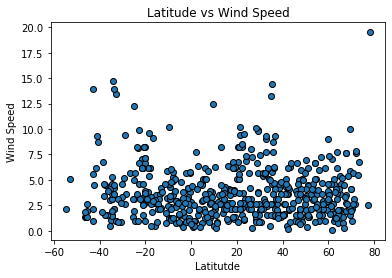

In [165]:
plt.scatter(data["lat"], data["Wind Speed"], edgecolors = "black")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/Fig4.png")

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots

In [11]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

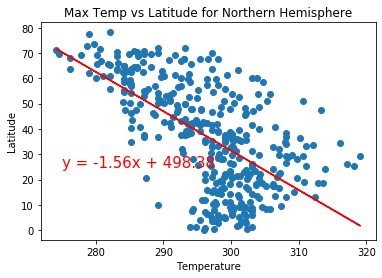

In [135]:
xvalue = data["Max Temp"][data["lat"] > 0]
yvalue = data["lat"][data["lat"] > 0]
(slope, intercept, ravalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalue, yvalue)
plt.plot(xvalue,regress_values , "r-")
plt.annotate(line_eq, (275, 25), fontsize = 15, color = "red")
plt.title("Max Temp vs Latitude for Northern Hemisphere")
plt.xlabel("Temperature")
plt.ylabel("Latitude")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

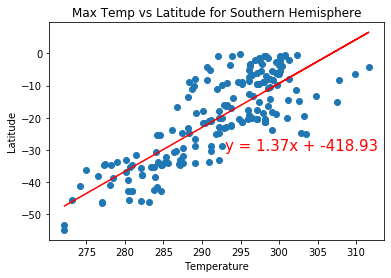

In [142]:
xvalue = data["Max Temp"][data["lat"] < 0]
yvalue = data["lat"][data["lat"] < 0]
(slope, intercept, ravalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalue, yvalue)
plt.plot(xvalue,regress_values , "r-")
plt.annotate(line_eq, (293, -30), fontsize = 15, color = "red")
plt.title("Max Temp vs Latitude for Southern Hemisphere")
plt.xlabel("Temperature")
plt.ylabel("Latitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

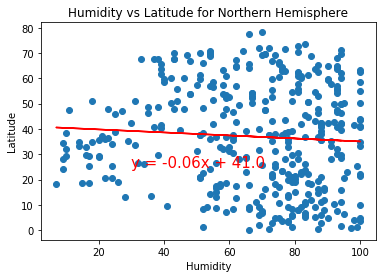

In [137]:
xvalue = data["Humidity"][data["lat"] > 0]
yvalue = data["lat"][data["lat"] > 0]
(slope, intercept, ravalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalue, yvalue)
plt.plot(xvalue,regress_values , "r-")
plt.annotate(line_eq, (30, 25), fontsize = 15, color = "red")
plt.title("Humidity vs Latitude for Northern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitude")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

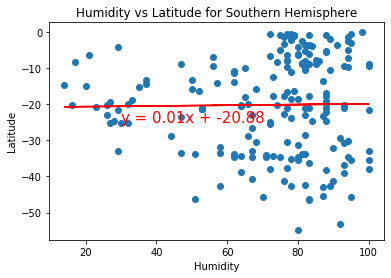

In [145]:
xvalue = data["Humidity"][data["lat"] < 0]
yvalue = data["lat"][data["lat"] < 0]
(slope, intercept, ravalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalue, yvalue)
plt.plot(xvalue,regress_values , "r-")
plt.annotate(line_eq, (30, -25), fontsize = 15, color = "red")
plt.title("Humidity vs Latitude for Southern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitude")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

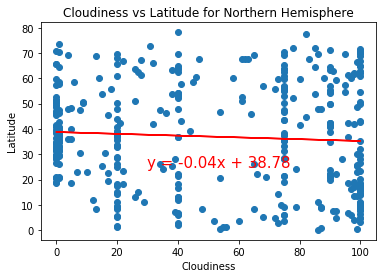

In [146]:
xvalue = data["Cloudiness"][data["lat"] > 0]
yvalue = data["lat"][data["lat"] > 0]
(slope, intercept, ravalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalue, yvalue)
plt.plot(xvalue,regress_values , "r-")
plt.annotate(line_eq, (30, 25), fontsize = 15, color = "red")
plt.title("Cloudiness vs Latitude for Northern Hemisphere")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

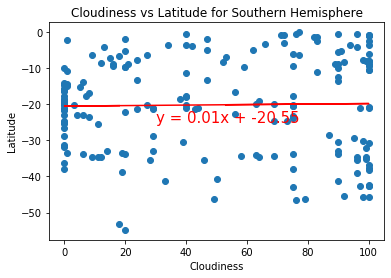

In [148]:
xvalue = data["Cloudiness"][data["lat"] < 0]
yvalue = data["lat"][data["lat"] < 0]
(slope, intercept, ravalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalue, yvalue)
plt.plot(xvalue,regress_values , "r-")
plt.annotate(line_eq, (30, -25), fontsize = 15, color = "red")
plt.title("Cloudiness vs Latitude for Southern Hemisphere")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

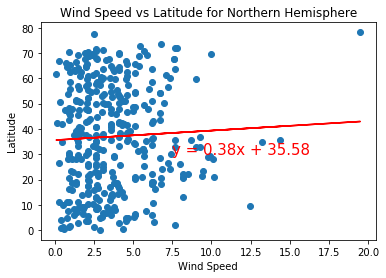

In [152]:
xvalue = data["Wind Speed"][data["lat"] > 0]
yvalue = data["lat"][data["lat"] > 0]
(slope, intercept, ravalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalue, yvalue)
plt.plot(xvalue,regress_values , "r-")
plt.annotate(line_eq, (7.5, 30), fontsize = 15, color = "red")
plt.title("Wind Speed vs Latitude for Northern Hemisphere")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

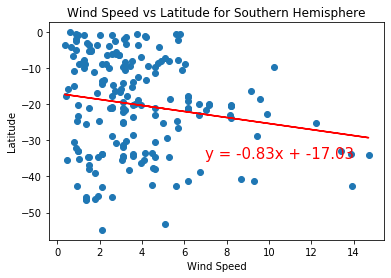

In [156]:
xvalue = data["Wind Speed"][data["lat"] < 0]
yvalue = data["lat"][data["lat"] < 0]
(slope, intercept, ravalue, pvalue, stderr) = linregress(xvalue, yvalue)
regress_values = xvalue * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xvalue, yvalue)
plt.plot(xvalue,regress_values , "r-")
plt.annotate(line_eq, (7, -35), fontsize = 15, color = "red")
plt.title("Wind Speed vs Latitude for Southern Hemisphere")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")